In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
energy = pd.read_csv('Daywise Consumption Data.csv',index_col='Datetime',parse_dates=True)
energy.rename({'PJMW_MW':'MW'},inplace=True,axis=1)
energy.head()

,MW
Datetime,
2002-04-01,5271.173913
2002-04-02,5310.416667
2002-04-03,5325.916667
2002-04-04,5670.791667
2002-04-05,5686.125000


#### Weekly Differencing

Text(0.5, 1.0, 'PACF of Differencing Series')

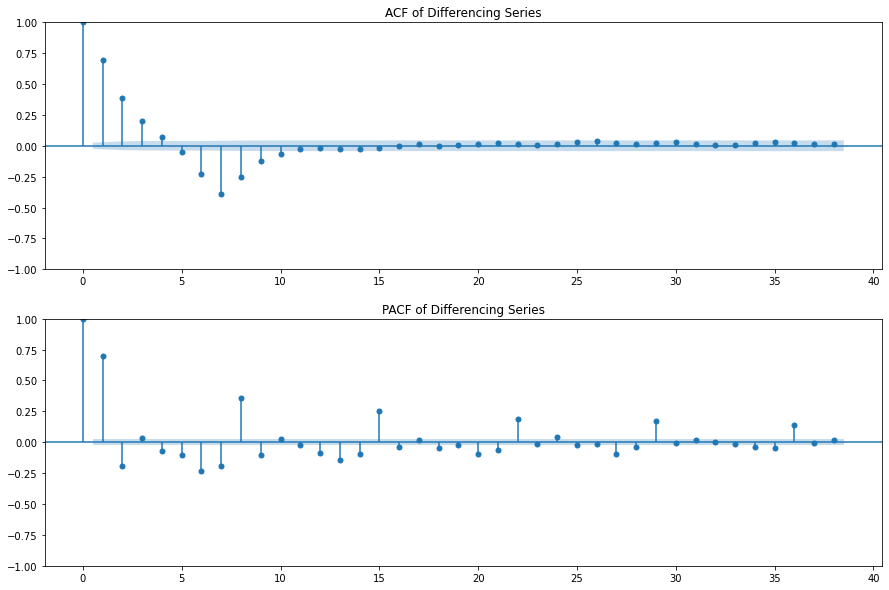

In [3]:
import statsmodels.graphics.tsaplots as tsa_plots
fig,ax=plt.subplots(2,1,figsize=(15,10))

tsa_plots.plot_acf(energy.diff(7).dropna(),ax=ax[0])
ax[0].set_title('ACF of Differencing Series')
tsa_plots.plot_pacf(energy.diff(7).dropna(),ax=ax[1])
ax[1].set_title('PACF of Differencing Series')

Text(0.5, 1.0, 'PACF of Differencing Series')

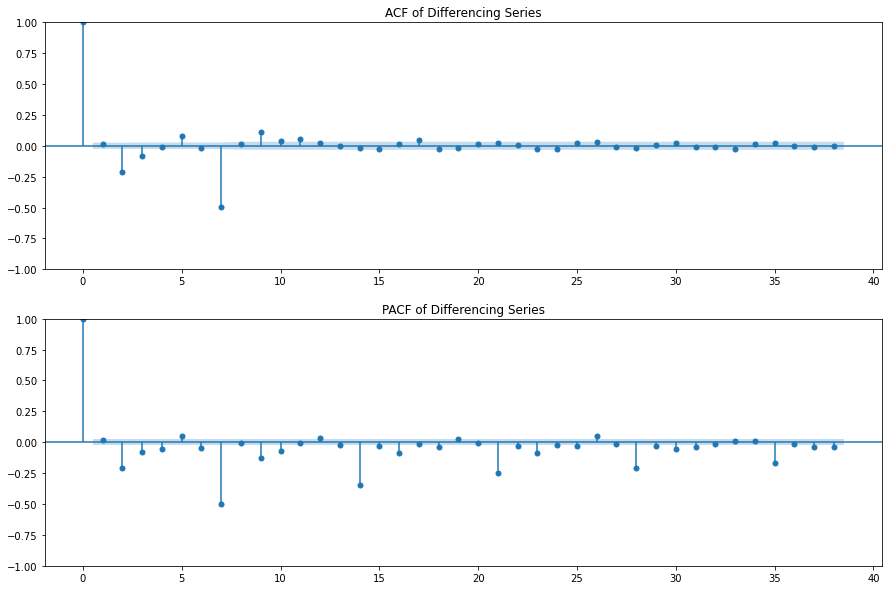

In [4]:
import statsmodels.graphics.tsaplots as tsa_plots
fig,ax=plt.subplots(2,1,figsize=(15,10))

tsa_plots.plot_acf(energy.diff(7).diff().dropna(),ax=ax[0])
ax[0].set_title('ACF of Differencing Series')
tsa_plots.plot_pacf(energy.diff(7).diff().dropna(),ax=ax[1])
ax[1].set_title('PACF of Differencing Series')

### Observation :
p=3,4
q=3,4
d=1
P =1 
Q =0
m=7

#### Train and Test Data

In [5]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2017,12,31)
test_dataset_end=datetime(2018,8,3)
train_data=energy[:train_dataset_end]
test_data=energy[train_dataset_end+timedelta(days=1):test_dataset_end]

In [6]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [7]:
test_data.tail()

,MW
Datetime,
2018-07-30,5492.708333
2018-07-31,5660.750000
2018-08-01,5959.708333
2018-08-02,5805.041667
2018-08-03,5489.000000


In [8]:
train_data.tail()

,MW
Datetime,
2017-12-27,6517.097337
2017-12-28,6407.948500
2017-12-29,6602.061179
2017-12-30,7045.000000
2017-12-31,6421.991444


In [9]:
print(' Train:',train_data.index.min(),train_data.index.max(),'\n','Test:',test_data.index.min(),test_data.index.max())

 Train: 2002-04-01 00:00:00 2017-12-31 00:00:00 
 Test: 2018-01-01 00:00:00 2018-08-03 00:00:00


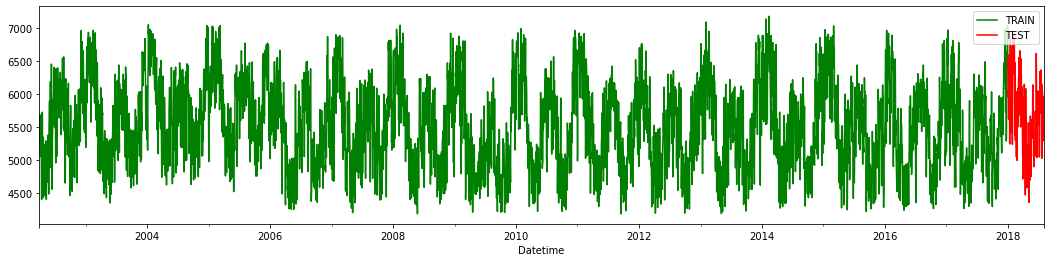

In [10]:
train_data.MW.plot(legend=True,label='TRAIN',color='green')
test_data.MW.plot(legend=True,label='TEST', figsize=(18,4),color='red')
plt.legend()
plt.show()

#### Arima Model

In [11]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(energy['MW'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=85916.248, Time=7.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=87293.533, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=87272.583, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=87239.868, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=87291.533, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=85950.855, Time=4.69 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=85926.965, Time=2.58 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=85889.641, Time=6.92 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=85925.747, Time=7.65 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=85368.618, Time=13.92 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=85785.989, Time=6.10 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=85423.559, Time=6.87 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=85037.928, Time=11.37 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=85866.645, Time=10.08 sec
 ARIMA(5,1,3)(0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5969
Model:               SARIMAX(5, 1, 3)   Log Likelihood              -42462.151
Date:                Sun, 23 Oct 2022   AIC                          84942.303
Time:                        12:27:16   BIC                          85002.550
Sample:                    04-01-2002   HQIC                         84963.230
                         - 08-03-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2539      0.020     12.723      0.000       0.215       0.293
ar.L2         -0.9342      0.013    -69.661      0.000      -0.961      -0.908
ar.L3          0.3985      0.028     14.404      0.000       0.344       0.453
ar.L4         -0.3297      0.013    -25.921      0.000      -0.355      -0.305
ar.L5         -0.1838      0.016    -11.857      0.000      -0.214      -0.153
ma.L1         -0.3001      0.017    -17.750      0.000      -0.333      -0.267
ma.L2          0.6410      0.009     74.328      0.000       0.624       0.658
ma.L3         -0.7076      0.017    -42.450      0.000      -0.740      -0.675
sigma2      9.311e+04   1610.516     57.813      0.000       9e+04    9.63e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):               104.77
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
from statsmodels.tsa.arima.model import ARIMA
model_ARIMA=ARIMA(train_data['MW'],order=(5,1,3))
model_ARIMA_fit=model_ARIMA.fit()
print(model_ARIMA_fit.summary())

C:\Users\Ankita Patil\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ankita Patil\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ankita Patil\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ankita Patil\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                     MW   No. Observations:                 5754
Model:                 ARIMA(5, 1, 3)   Log Likelihood              -40887.101
Date:                Sun, 23 Oct 2022   AIC                          81792.202
Time:                        12:27:24   BIC                          81852.119
Sample:                    04-01-2002   HQIC                         81813.053
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2631      0.020     13.349      0.000       0.224       0.302
ar.L2         -0.9414      0.013    -71.561      0.000      -0.967      -0.916
ar.L3          0.4218      0.027     15.361      0.0

In [13]:
n=365
forecast_weekly_arima=model_ARIMA_fit.forecast(n)

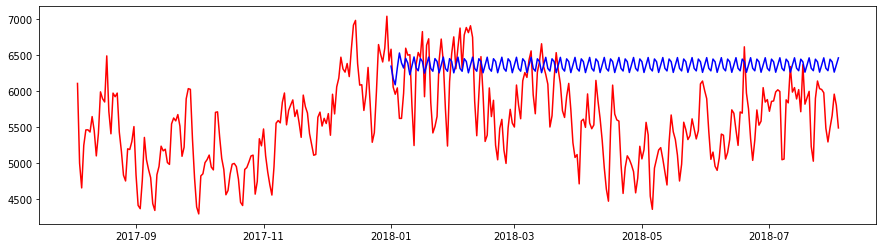

In [14]:
forecast_series_arima = pd.Series(forecast_weekly_arima,index=test_data.index)
forecast_series_arima=forecast_series_arima.bfill(axis='rows')
fig,ax = plt.subplots(figsize=(15,4))
plt.plot(energy[-365:].index,energy[-365:].values,label='Actual Values',color='red')
plt.plot(forecast_series_arima[-365:].index,forecast_series_arima[-365:].values,label='Predication',color='Blue')
plt.show()

In [15]:
def mape(forecast,actual):
    mape=round(np.mean(np.abs(forecast - actual)/np.abs(actual))*100,2)
    return mape

In [16]:
arima_mape_val = mape(forecast_series_arima.values,test_data.values)
print(arima_mape_val)

13.73


In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
arima_rmse_val=sqrt((mean_squared_error(forecast_series_arima,test_data.values)))
print(arima_rmse_val)

858.2818155606052


#### SARIMA Model - 7 differencing

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMA=SARIMAX(train_data['MW'],order=(4,1,2),seasonal_order=(1,1,0,7))

C:\Users\Ankita Patil\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ankita Patil\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [19]:
model_SARIMA_fit=model_SARIMA.fit(disp=-1)
print(model_SARIMA_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                 MW   No. Observations:                 5754
Model:             SARIMAX(4, 1, 2)x(1, 1, [], 7)   Log Likelihood              -41213.225
Date:                            Sun, 23 Oct 2022   AIC                          82442.450
Time:                                    12:27:34   BIC                          82495.700
Sample:                                04-01-2002   HQIC                         82460.982
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1191      0.203     -0.586      0.558      -0.518       0.280
ar.L2          0.6365      0.180   

In [20]:
n=365
forecast_weekly_sarima=model_SARIMA_fit.forecast(n)

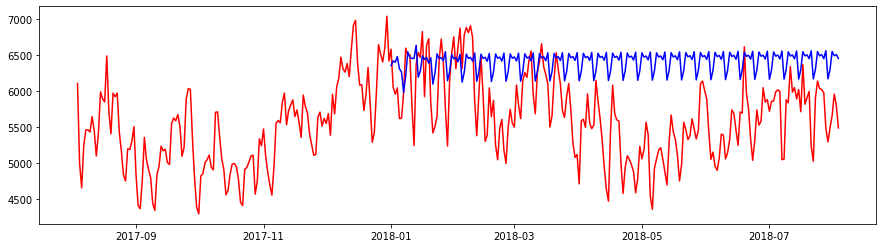

In [21]:
forecast_series_sarima = pd.Series(forecast_weekly_sarima,index=test_data.index)
forecast_series_sarima=forecast_series_sarima.bfill(axis='rows')
fig,ax = plt.subplots(figsize=(15,4))
plt.plot(energy[-365:].index,energy[-365:].values,label='Actual Values',color='red')
plt.plot(forecast_series_sarima[-365:].index,forecast_series_sarima[-365:].values,label='Predication',color='Blue')
plt.show()

In [22]:
sarima_mape_val = mape(forecast_series_sarima.values,test_data.values)
print(sarima_mape_val)

14.44


In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sarima_rmse_val=sqrt((mean_squared_error(forecast_series_sarima,test_data.values)))
print(sarima_rmse_val)

894.0577108042359


#### Machine Learning Algorithm

In [24]:
data=energy.copy()
data['energy_1dayback']=data['MW'].shift(+1)
data['energy_2dayback']=data['MW'].shift(+2)
data['energy_3dayback']=data['MW'].shift(+3)
data['energy_4dayback']=data['MW'].shift(+4)
data['energy_5dayback']=data['MW'].shift(+5)
data['energy_6dayback']=data['MW'].shift(+6)
data['energy_7dayback']=data['MW'].shift(+7)
data.head(10)

,MW,energy_1dayback,energy_2dayback,energy_3dayback,energy_4dayback,energy_5dayback,energy_6dayback,energy_7dayback
Datetime,,,,,,,,
2002-04-01,5271.173913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-04-02,5310.416667,5271.173913,NaN,NaN,NaN,NaN,NaN,NaN
2002-04-03,5325.916667,5310.416667,5271.173913,NaN,NaN,NaN,NaN,NaN
2002-04-04,5670.791667,5325.916667,5310.416667,5271.173913,NaN,NaN,NaN,NaN
2002-04-05,5686.125000,5670.791667,5325.916667,5310.416667,5271.173913,NaN,NaN,NaN
2002-04-06,5367.791667,5686.125000,5670.791667,5325.916667,5310.416667,5271.173913,NaN,NaN
2002-04-07,5060.652174,5367.791667,5686.125000,5670.791667,5325.916667,5310.416667,5271.173913,NaN
2002-04-08,5283.875000,5060.652174,5367.791667,5686.125000,5670.791667,5325.916667,5310.416667,5271.173913
2002-04-09,5136.083333,5283.875000,5060.652174,5367.791667,5686.125000,5670.791667,5325.916667,5310.416667


In [25]:
data=data.dropna()
data

,MW,energy_1dayback,energy_2dayback,energy_3dayback,energy_4dayback,energy_5dayback,energy_6dayback,energy_7dayback
Datetime,,,,,,,,
2002-04-08,5283.875000,5060.652174,5367.791667,5686.125000,5670.791667,5325.916667,5310.416667,5271.173913
2002-04-09,5136.083333,5283.875000,5060.652174,5367.791667,5686.125000,5670.791667,5325.916667,5310.416667
2002-04-10,5171.666667,5136.083333,5283.875000,5060.652174,5367.791667,5686.125000,5670.791667,5325.916667
2002-04-11,5207.875000,5171.666667,5136.083333,5283.875000,5060.652174,5367.791667,5686.125000,5670.791667
2002-04-12,5090.416667,5207.875000,5171.666667,5136.083333,5283.875000,5060.652174,5367.791667,5686.125000
...,...,...,...,...,...,...,...,...
2018-07-30,5492.708333,5293.833333,5485.791667,5978.750000,6024.537404,6036.208333,6142.666667,5900.041667
2018-07-31,5660.750000,5492.708333,5293.833333,5485.791667,5978.750000,6024.537404,6036.208333,6142.666667
2018-08-01,5959.708333,5660.750000,5492.708333,5293.833333,5485.791667,5978.750000,6024.537404,6036.208333


In [26]:
x1,x2,x3,x4,x5,x6,x7,y=data['energy_1dayback'],data['energy_2dayback'],data['energy_3dayback'],data['energy_4dayback'],data['energy_5dayback'],data['energy_6dayback'],data['energy_7dayback'],data['MW']
x1,x2,x3,x4,x5,x6,x7,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(y)
x1,x2,x3,x4,x5,x6,x7,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),x7.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4,x5,x6,x7),axis=1)
print(final_x)

[[5060.65217391 5367.79166667 5686.125      ... 5325.91666667
  5310.41666667 5271.17391304]
 [5283.875      5060.65217391 5367.79166667 ... 5670.79166667
  5325.91666667 5310.41666667]
 [5136.08333333 5283.875      5060.65217391 ... 5686.125
  5670.79166667 5325.91666667]
 ...
 [5660.75       5492.70833333 5293.83333333 ... 5978.75
  6024.5374039  6036.20833333]
 [5959.70833333 5660.75       5492.70833333 ... 5485.79166667
  5978.75       6024.5374039 ]
 [5805.04166667 5959.70833333 5660.75       ... 5293.83333333
  5485.79166667 5978.75      ]]


In [27]:
X_train,X_test,y_train,y_test=final_x[:-365],final_x[-365:],y[:-365],y[-365:]

In [28]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [29]:
lin_model.fit(X_train,y_train)

LinearRegression()

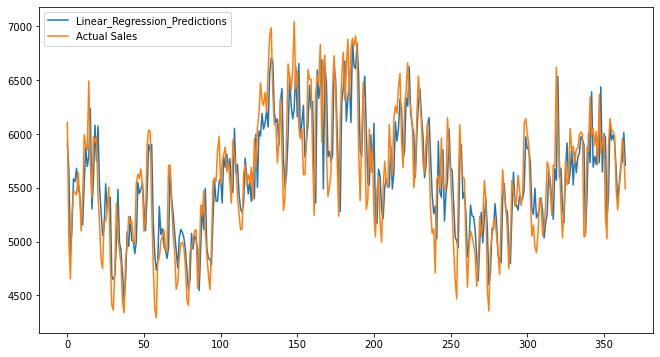

In [30]:
lin_pred=lin_model.predict(X_test)
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
MAPE_LR = round((mean_absolute_percentage_error(lin_pred,y_test)*100),3)
RMSE_LR=sqrt(mean_squared_error(lin_pred,y_test))
print('MAPE:',MAPE_LR)
print('RMSE:',RMSE_LR)

MAPE: 4.615
RMSE: 330.11459881429613


In [32]:
from sklearn.ensemble import RandomForestRegressor
ran_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [33]:
ran_model.fit(X_train,y_train)

RandomForestRegressor(max_features=3, random_state=1)

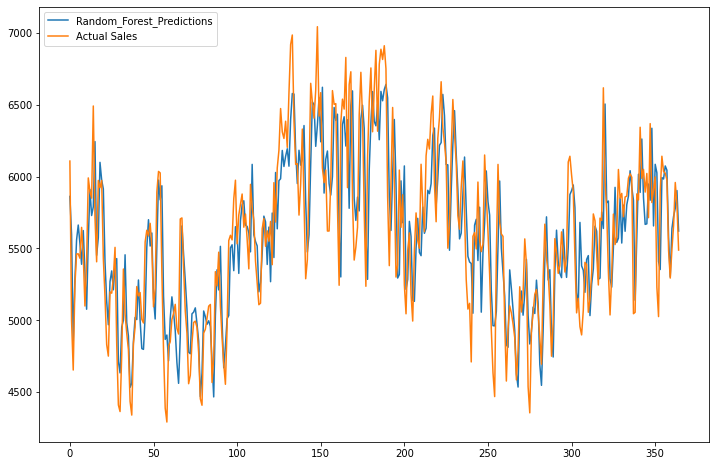

In [34]:
ran_pred=ran_model.predict(X_test)
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(ran_pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [35]:
MAPE_RF = round((mean_absolute_percentage_error(ran_pred,y_test)*100),3)
RMSE_RF=sqrt(mean_squared_error(ran_pred,y_test))
print('MAPE:',MAPE_RF)
print('RMSE:',RMSE_RF)

MAPE: 4.662
RMSE: 328.2626142080407


In [36]:
from xgboost import XGBRegressor
xg_model = XGBRegressor()
xg_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

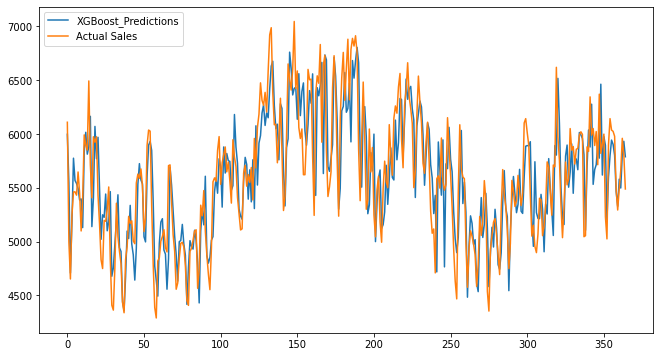

In [37]:
predictions = xg_model.predict(X_test)
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(predictions,label='XGBoost_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [38]:
MAPE_XG= round((mean_absolute_percentage_error(y_test,predictions)*100),3)
RMSE_XG=sqrt(mean_squared_error(predictions,y_test))
print('MAPE:',MAPE_XG)
print('RMSE:',RMSE_XG)

MAPE: 4.609
RMSE: 331.6059910196991


#### Forecasting

In [39]:
forecast_check_data = np.array(data['MW'][:'2018-07-04'][-7:])

#### Linear Regression 

In [40]:
from sklearn.linear_model import LinearRegression
final_lin_model=LinearRegression()
final_lin_model.fit(final_x,y)

LinearRegression()

In [41]:
z=forecast_check_data

for i in range(0,30):
    ck=z[-7:]
    ck=np.array([ck])
    lin_f_chk=final_lin_model.predict(ck)
    z=np.append(z,lin_f_chk)
    i=+1
future_pred_lr=z[-30:]

In [42]:
future_pred_lr

array([6033.60788565, 5841.57799245, 5929.48118121, 5708.87025829,
       5848.34181097, 5794.14047298, 5886.03164721, 6004.65807732,
       5798.39584194, 5968.99080168, 5691.04716438, 5854.22119273,
       5759.174827  , 5793.84809772, 5983.29828273, 5725.89564913,
       6004.16838058, 5661.79908609, 5863.39265323, 5752.24260791,
       5709.26199494, 5984.20104933, 5629.59508495, 6040.14191492,
       5620.37578829, 5866.45941444, 5768.74251095, 5622.02607836,
       6017.71357715, 5512.30783926])

In [43]:
future_chk = pd.date_range('2018-07-05','2018-08-03', freq='D')
future_chk_df = pd.DataFrame(index=future_chk)

In [44]:
future_chk_df['future_chk_energy'] = future_pred_lr.tolist()

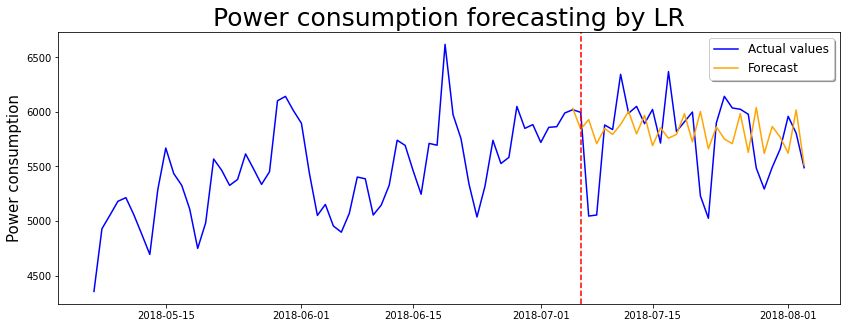

In [45]:
plt.figure(figsize=(14,5))
plt.title("Power consumption forecasting by LR", fontsize=25)
plt.plot(data['MW'][-90:].index,data['MW'][-90:].values, label='Actual values', color="blue")
plt.plot(future_chk_df.index,future_chk_df.values, label='Forecast', color="orange")
plt.axvline(future_chk_df.index[1], color="red", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()

In [46]:
data_last_30 = data['MW'].tail(30)

In [47]:
MAPE_check= round((mean_absolute_percentage_error(data_last_30,future_chk_df)*100),3)
RMSE_check=sqrt(mean_squared_error(future_chk_df,data_last_30))
print('MAPE forecast:',MAPE_check)
print('RMSE forecast:',RMSE_check)

MAPE forecast: 5.08
RMSE forecast: 374.62832730569306


#### Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor
final_RF_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)
final_RF_model.fit(final_x,y)

RandomForestRegressor(max_features=3, random_state=1)

In [49]:
z=forecast_check_data

for i in range(0,30):
    ck=z[-7:]
    ck=np.array([ck])
    rf_f_chk=final_RF_model.predict(ck)
    z=np.append(z,rf_f_chk)
    i=+1
future_pred_RF=z[-30:]

In [50]:
future_pred_RF

array([5986.96683521, 5912.2451051 , 5982.60642689, 5803.96847875,
       5859.1133472 , 5852.03907618, 5901.2751327 , 5955.74312717,
       5954.19942351, 6014.60323983, 5930.45306961, 5975.1262352 ,
       5960.98398856, 6008.3868766 , 6027.75705748, 6047.13998808,
       6029.53244789, 6075.75069446, 6042.57666162, 6024.90035089,
       6029.40442923, 5975.77604671, 6025.38188566, 5962.59776538,
       6001.06006122, 5953.18991593, 5963.37850562, 5973.37321873,
       6022.19605048, 6000.25586404])

In [51]:
future_chk_rf = pd.date_range('2018-07-05','2018-08-03', freq='D')
future_chk_df_rf = pd.DataFrame(index=future_chk_rf)
future_chk_df_rf['future_chk_energy'] = future_pred_RF.tolist()

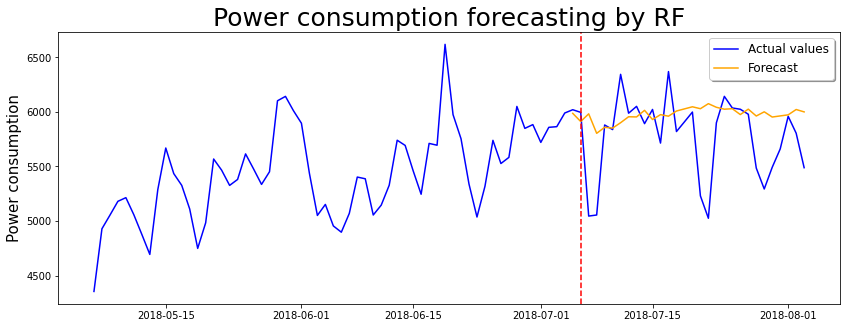

In [52]:
plt.figure(figsize=(14,5))
plt.title("Power consumption forecasting by RF", fontsize=25)
plt.plot(data['MW'][-90:].index,data['MW'][-90:].values, label='Actual values', color="blue")
plt.plot(future_chk_df_rf.index,future_chk_df_rf.values, label='Forecast', color="orange")
plt.axvline(future_chk_df_rf.index[1], color="red", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()

In [53]:
MAPE_rf_check= round((mean_absolute_percentage_error(data_last_30,future_chk_df_rf)*100),3)
RMSE_rf_check=sqrt(mean_squared_error(future_chk_df_rf,data_last_30))
print('MAPE forecast:',MAPE_rf_check)
print('RMSE forecast:',RMSE_rf_check)

MAPE forecast: 5.231
RMSE forecast: 411.64293168073164


#### XG Boost

In [54]:
from xgboost import XGBRegressor
final_xg_model = XGBRegressor()
final_xg_model.fit(final_x,y, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [55]:
z=forecast_check_data

for i in range(0,30):
    ck=z[-7:]
    ck=np.array([ck])
    xgb_f_chk=final_xg_model.predict(ck)
    z=np.append(z,xgb_f_chk)
    i=+1
future_pred_XGB=z[-30:]

In [56]:
future_pred_XGB

array([5871.81787109, 5672.69482422, 5888.62158203, 5183.52148438,
       5876.31347656, 5616.05957031, 5986.21435547, 5864.69628906,
       5587.54541016, 6188.74365234, 4936.29296875, 6090.29394531,
       5062.75488281, 5793.22998047, 5674.09326172, 5502.69824219,
       6220.97460938, 4677.18798828, 6413.23193359, 4450.58251953,
       5705.74951172, 5606.68017578, 5429.38134766, 6060.64501953,
       4547.62792969, 6592.09814453, 3898.78100586, 5274.01220703,
       5811.19921875, 5439.92822266])

In [57]:
future_chk_xgb = pd.date_range('2018-07-05','2018-08-03', freq='D')
future_chk_df_xgb = pd.DataFrame(index=future_chk_xgb)
future_chk_df_xgb['future_chk_energy'] = future_pred_XGB.tolist()

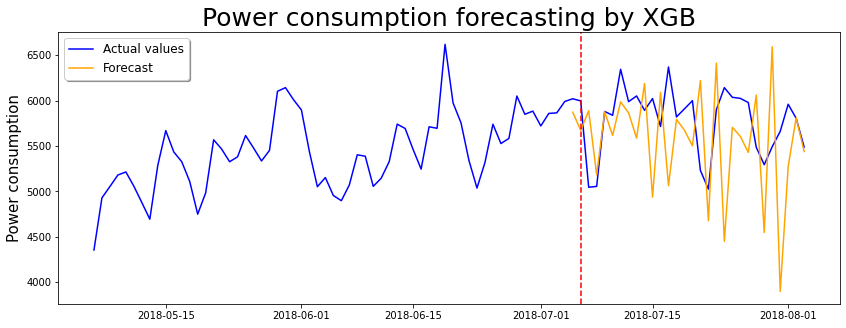

In [58]:
plt.figure(figsize=(14,5))
plt.title("Power consumption forecasting by XGB", fontsize=25)
plt.plot(data['MW'][-90:].index,data['MW'][-90:].values, label='Actual values', color="blue")
plt.plot(future_chk_df_xgb.index,future_chk_df_xgb.values, label='Forecast', color="orange")
plt.axvline(future_chk_df_xgb.index[1], color="red", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()

In [59]:
MAPE_xgb_check= round((mean_absolute_percentage_error(data_last_30,future_chk_df_xgb)*100),3)
RMSE_xgb_check=sqrt(mean_squared_error(future_chk_df_xgb,data_last_30))
print('MAPE forecast:',MAPE_xgb_check)
print('RMSE forecast:',RMSE_xgb_check)

MAPE forecast: 9.371
RMSE forecast: 711.0521193028417


#### Combining all RMSE and MAPE Values of all Models

In [60]:
Evaluation = {
    "Models":pd.Series(["ARIMA","SARIMA","Linear Regression","Random Forest","XG Boost"]),\
    "RMSE":pd.Series([arima_rmse_val,sarima_rmse_val,RMSE_check,RMSE_rf_check,RMSE_xgb_check]),\
    "MAPE(%)":pd.Series([arima_mape_val,sarima_mape_val,MAPE_check,MAPE_rf_check,MAPE_xgb_check])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['MAPE(%)'], inplace=True, ignore_index=True)
table_evaluation

,Models,RMSE,MAPE(%)
0,Linear Regression,374.628327,5.080
1,Random Forest,411.642932,5.231
2,XG Boost,711.052119,9.371
3,ARIMA,858.281816,13.730
4,SARIMA,894.057711,14.440


#### As Mape value is minimum for Linear Regression.
#### i.e we will select final model as Linear Regression.

#### Final Model

In [110]:
from sklearn.linear_model import LinearRegression
final_model=LinearRegression()
final_model_fit=final_model.fit(final_x,y)

In [117]:
z=forecast_check_data

for i in range(0,7):
    ck=z[-7:]
    ck=np.array([ck])
    lin_f_chk=final_model.predict(ck)
    z=np.append(z,lin_f_chk)
    i=+1
future_pred_lr=z[-7:]

In [118]:
Predict=pd.date_range('2022-10-23','2022-10-29', freq='D')
future_df = pd.DataFrame(index=Predict)

In [119]:
future_df['future_chk_energy'] = future_pred_lr.tolist()

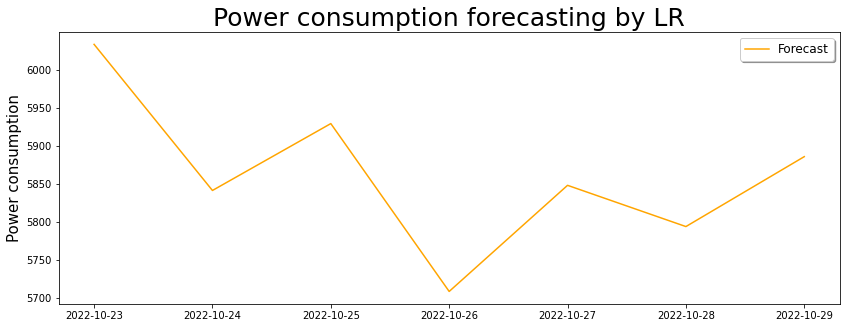

In [120]:
plt.figure(figsize=(14,5))
plt.title("Power consumption forecasting by LR", fontsize=25)
plt.plot(future_df.index,future_df.values, label='Forecast', color="orange")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()

In [121]:
future_df

,future_chk_energy
2022-10-23,6033.607886
2022-10-24,5841.577992
2022-10-25,5929.481181
2022-10-26,5708.870258
2022-10-27,5848.341811
2022-10-28,5794.140473
2022-10-29,5886.031647


#### Pickle File

In [116]:
import pickle
pickle.dump(final_model_fit, open('Linear_Regression_Final_Model.pkl','wb'))